# Load datasets, drop uneeded columns

In [52]:
import pandas as pd
import numpy as np

DATASET_PATH="/Users/eno/Datasets/"

# load the data
df_01_2019 = pd.read_csv(f'{DATASET_PATH}/flightlist_20190101_20190131.csv', low_memory=False)
df_03_2020 = pd.read_csv(f'{DATASET_PATH}/flightlist_20200401_20200430.csv')
df_10_2022 = pd.read_csv(f'{DATASET_PATH}/flightlist_20221001_20221031.csv')

#drop the columns we dont want anymore, and remove the NaN values from the relevant ones
df_19_cleaned = df_01_2019.drop(columns=["registration", "latitude_1", "longitude_1", "longitude_2", "latitude_2", "altitude_1", "altitude_2", "firstseen", "lastseen"])
df_20_cleaned = df_03_2020.drop(columns=["registration", "latitude_1", "longitude_1", "longitude_2", "latitude_2", "altitude_1", "altitude_2", "firstseen", "lastseen"])
df_22_cleaned = df_10_2022.drop(columns=["registration", "latitude_1", "longitude_1", "longitude_2", "latitude_2", "altitude_1", "altitude_2", "firstseen", "lastseen"])
df_19_cleaned = df_19_cleaned.dropna(subset=["origin", "destination", "day"])
df_20_cleaned = df_20_cleaned.dropna(subset=["origin", "destination", "day"])
df_22_cleaned = df_22_cleaned.dropna(subset=["origin", "destination", "day"])




# Filter just for air traffic to, from, or within the United States

In [46]:

#filter the resulting dataframes for only air traffic to, from, or within the United States
df_19_cleaned = df_19_cleaned[(df_19_cleaned["origin"].str.startswith("K")) | (df_19_cleaned["destination"].str.startswith("K"))]
df_20_cleaned = df_20_cleaned[(df_20_cleaned["origin"].str.startswith("K")) | (df_20_cleaned["destination"].str.startswith("K"))]
df_22_cleaned = df_22_cleaned[(df_22_cleaned["origin"].str.startswith("K")) | (df_22_cleaned["destination"].str.startswith("K"))]



# Filter just for the 10 busiest airports in the country

In [49]:
airport_codes = ["KDFW", "KDEN", "KORD", "KLAX", "KCLT", "KLAS", "KPHX", "KMIA"]

# create an empty dictionary to store the counts for each of the 3 years, as well as 2 dictionaries to store the percentages
airport_counts_20 = {}
airport_counts_22 = {}
airport_counts_19 = {}
change_dict_19_20 = {}
change_dict_20_22 = {}

# iterate over the airports and count the occurrences of each
for airport in airport_codes:
    count_2019 = ((df_19_cleaned["origin"] == airport) | (df_19_cleaned["destination"] == airport)).sum()
    count_2020 = ((df_20_cleaned["origin"] == airport) | (df_20_cleaned["destination"] == airport)).sum()
    count_2022 = ((df_22_cleaned["origin"] == airport) | (df_22_cleaned["destination"] == airport)).sum()
    #add the count recorded to the dictionary to store the counts
    airport_counts_19[airport] = count_2019
    airport_counts_20[airport] = count_2020
    airport_counts_22[airport] = count_2022

#iterate over the airports and calculate the difference between the counts for the years
for airport in airport_codes:
    change_20_22 = airport_counts_22[airport] - airport_counts_20[airport]
    change_19_20 = airport_counts_20[airport] - airport_counts_19[airport]
    #calculate the percentage change between 2019 and 2020 (pre-covid vs during covid), as well as for 2020 to 2022 (during covid vs post-covid)
    pct_change_19_20 = (change_19_20 / airport_counts_19[airport]) * 100
    pct_change_20_22 = (change_20_22 / airport_counts_20[airport]) * 100
    #add the calculated percentage to the dictionary, and convert it to a float for matplotlib
    change_dict_19_20[airport] = float("{:.2f}".format(pct_change_19_20))
    change_dict_20_22[airport] = float("{:.2f}".format(pct_change_20_22))

    print(f'In March 2020 {airport} recorded {airport_counts_20[airport]} flights. In October 2022 it recorded {airport_counts_22[airport]}. This indicates a {pct_change_20_22:.2f}% change between 2020 and 2022')
    print(f'In January 2019 {airport} recorded {airport_counts_19[airport]} flights. In March 2020 it recorded {airport_counts_20[airport]}. This indicates a {pct_change_19_20:.2f}% change between 2019 and 2020')



In March 2020 KDFW recorded 15073 flights. In October 2022 it recorded 39901. This indicates a 164.72% change between 2020 and 2022
In January 2019 KDFW recorded 29771 flights. In March 2020 it recorded 15073. This indicates a -49.37% change between 2019 and 2020
In March 2020 KDEN recorded 9531 flights. In October 2022 it recorded 41468. This indicates a 335.09% change between 2020 and 2022
In January 2019 KDEN recorded 22801 flights. In March 2020 it recorded 9531. This indicates a -58.20% change between 2019 and 2020
In March 2020 KORD recorded 18908 flights. In October 2022 it recorded 50070. This indicates a 164.81% change between 2020 and 2022
In January 2019 KORD recorded 30864 flights. In March 2020 it recorded 18908. This indicates a -38.74% change between 2019 and 2020
In March 2020 KLAX recorded 12385 flights. In October 2022 it recorded 34495. This indicates a 178.52% change between 2020 and 2022
In January 2019 KLAX recorded 30783 flights. In March 2020 it recorded 12385. 

# Using matplotlib to visualize the data

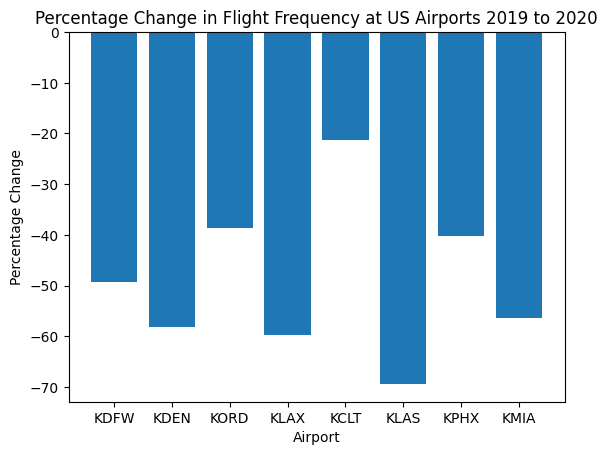

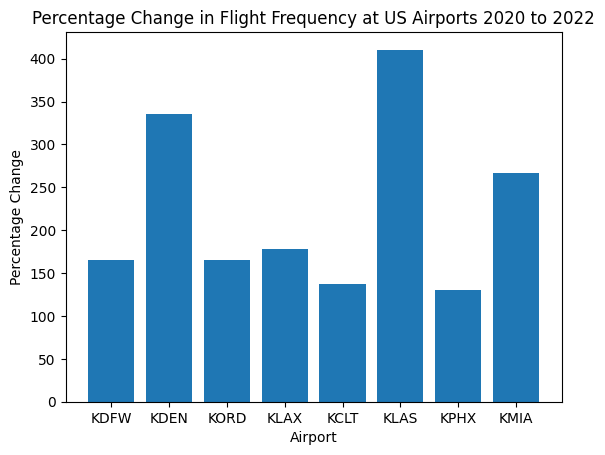

In [51]:
import matplotlib.pyplot as plt
#create bar graph for percent change 2019 to 2020
plt.bar(change_dict_19_20.keys(), change_dict_19_20.values())
plt.xlabel('Airport')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Flight Frequency at US Airports 2019 to 2020')
plt.show()

#create a bar graph for percent change 2020 to 2022
plt.bar(change_dict_20_22.keys(), change_dict_20_22.values())
plt.xlabel('Airport')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Flight Frequency at US Airports 2020 to 2022')
plt.show()

# Conclusions

The increase of air traffic at various airports post covid indicates that people are flying even more now than they were before covid. Additionally, Las Vegas, the airport that experienced the largest decrease from 2019-2020 also experienced the largest increase in traffic 2020-2022. 